# Student Score Prediction Analysis

This notebook demonstrates how to train a machine learning model to predict student final exam marks based on various features like attendance, internal tests, assignments, and study hours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

%matplotlib inline
print("Libraries imported successfully.")

Libraries imported successfully.


## 1. Load the Data

In [5]:
# Load the dataset
try:
    df = pd.read_csv('src/Final_Marks_Data.csv')
    print("Data loaded successfully. Shape:", df.shape)
    display(df.head())
except FileNotFoundError:
    print("Error: 'Final_Marks_Data.csv' not found.")

Data loaded successfully. Shape: (2000, 7)


,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,S1000,84,30,36,7,3,72
1,S1001,91,24,38,6,3,56
2,S1002,73,29,26,7,3,56
3,S1003,80,36,35,7,3,74
4,S1004,84,31,37,8,3,66


## 2. Preprocessing and Feature Selection

In [6]:
# Define features and target
feature_columns = [
    'Attendance (%)', 
    'Internal Test 1 (out of 40)', 
    'Internal Test 2 (out of 40)', 
    'Assignment Score (out of 10)', 
    'Daily Study Hours'
]
target_column = 'Final Exam Marks (out of 100)'

X = df[feature_columns]
y = df[target_column]

print("Features selected:", feature_columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Features selected: ['Attendance (%)', 'Internal Test 1 (out of 40)', 'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)', 'Daily Study Hours']
Training set size: 1600
Testing set size: 400


## 3. Train the Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


## 4. Evaluate the Model

Mean Squared Error: 21.33
R-squared: 0.8297


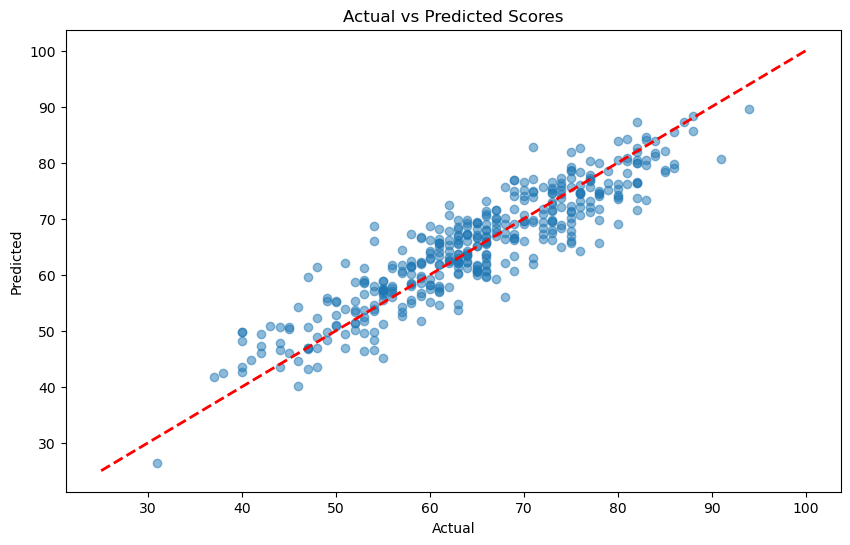

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Scores')
plt.show()

## 5. Save the Model

In [9]:
model_filename = 'student_score_predictor.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to student_score_predictor.pkl


## 6. Make a Prediction

In [10]:
# Example prediction
# Attendance: 90%, Test 1: 35, Test 2: 38, Assignment: 9, Study Hours: 4
new_data = pd.DataFrame([[90, 35, 38, 9, 4]], columns=feature_columns)
predicted_score = model.predict(new_data)

print(f"Inputs:")
print(new_data)
print(f"\nPredicted Final Exam Score: {predicted_score[0]:.2f}")

Inputs:
   Attendance (%)  Internal Test 1 (out of 40)  Internal Test 2 (out of 40)  \
0              90                           35                           38   

   Assignment Score (out of 10)  Daily Study Hours  
0                             9                  4  

Predicted Final Exam Score: 79.90
